### Problem 1 

- Akhil Nair
- Mounica Subramani
- Mrinal Soni 
- SuRui Yang

### Problem 2

The visualization I chose to compare and review for Problem 2 of HW1 is by Bishishta.

https://github.com/bishishta/Information-Visualization/tree/master/DS5500_HW1

The visualization is about the distribution of GPA per Capita across countries over time. Her plot was a clear static line plot. There were 20 sub plots for 193 countries where 10 countries were represented in each plot. We have "Year" in X-axis and GDP per Capita in the y axis.

There was also another plot representing GDP/Capita across continents over time which is again a simple static 2D lne plot.

The plot that I have mode for problem 2 was similar to the one that represents GDP/capita across continents over time from Bishishta's plots. However the clear representation of distribution of GDP/capita across countries was interesting and it is easy to interpret. It also does justice to the actual question. Her plot was able to explain what was asked in the problem and interpretations were clear. Interpretations based on the second plot for both of us were kind of similar

### Problem 3

The visualization I chose to compare and review for Problem 3 of HW1 is by Monica Mishra.

https://colab.research.google.com/drive/1v8EY74vQxPubjXHywpDUYo7a3FMj-GuB#scrollTo=KXfw0fJqJwab

The visualization is about the relationship between income (GDP / capita), life expectancy, and child mortality over time. We both have split the problem into three parts and plotted each feature relationship and used interactive dynamic plots for the problem. She also used the Google colab effectively for all her visualization plots. both of us have represented 4 continents instead of six.

The visualizations are easily interpretable. Her interpretations were also clear and did answer the questions in problem 3.

### Problem 4

In [94]:
import numpy as np 
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [84]:
gdpc_income = pd.read_csv("C:/Users/mouni/Downloads/DS5500/HW2/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
life_exp = pd.read_csv("ddf--datapoints--life_expectancy_years--by--geo--time.csv")

In [85]:
gdpc_income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [86]:
gdpc_income = gdpc_income.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "income_per_person"})
gdpc_income.head()

,geo,time,income_per_person
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [17]:
life_exp.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [18]:
merge_df = pd.merge(gdpc_income,life_exp, on = ['geo', 'time'])
merge_df.head()

,geo,time,income_per_person,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [19]:
merge_df['log_gdp_income'] = np.log(merge_df.income_per_person)

In [20]:
merge_df.head()

,geo,time,income_per_person,life_expectancy_years,log_gdp_income
0,afg,1800,603,28.21,6.401917
1,afg,1801,603,28.20,6.401917
2,afg,1802,603,28.19,6.401917
3,afg,1803,603,28.18,6.401917
4,afg,1804,603,28.17,6.401917


### Linear Regression Model

Find correlation between the feature variables for better modelling.

Text(0, 0.5, 'log(gdp income)')

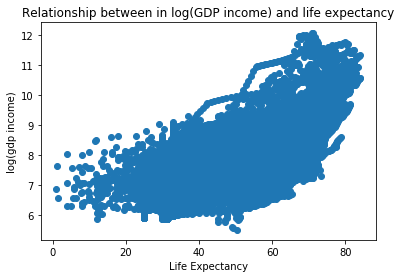

In [56]:
plt.scatter(merge_df["life_expectancy_years"],merge_df["log_gdp_income"])
plt.title("Relationship between in log(GDP income) and life expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("log(gdp income)")

There is a positive correlation between increase in gdp per capita income and life expectancy over years. The relationship is quite linear from pot that made out of mean values. So, trying a linear regression model on this data will be a good idea.

In [29]:
X = merge_df["life_expectancy_years"].values.reshape(-1,1)
Y = merge_df["log_gdp_income"].values.reshape(-1,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size=0.25, random_state=0)

linear_reg = LinearRegression()  
fit = linear_reg.fit(xTrain, yTrain)
print(fit)

coeff = linear_reg.coef_
print(coeff)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[0.05623936]]


In [37]:
y_pred = linear_reg.predict(xTest)
y_pred

array([[8.24279466],
       [6.9335424 ],
       [7.02914931],
       ...,
       [7.84630719],
       [8.43063412],
       [9.00146361]])

In [41]:
err = metrics.mean_squared_error(yTest,y_pred)
acc = 1 - err
print("Accuracy of the model: ", acc)
print("Error of the model: ", err)

Accuracy of the model:  0.5920870405134402
Error of the model:  0.40791295948655987


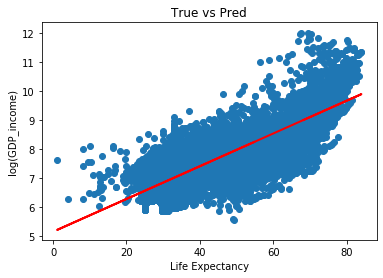

In [74]:
plt.scatter(xTest, yTest)
plt.plot(xTest, y_pred, color='red', linewidth=2)
plt.title("True vs Pred")
plt.ylabel("log(GDP_income)")
plt.xlabel("Life Expectancy")
plt.show()

In [50]:
err = metrics.mean_squared_error(yTest,y_pred)
acc = 1 - err
print("Accuracy: ", acc)
print("Error: ", err)

Accuracy:  0.5920870405134402
Error:  0.40791295948655987


It is observed that the accuracy of the model is not at its best and also the predicted line doesn't seem to be a best fit for the model and from the abouve graph it's not clear about model predictions too.

In [55]:
merge_df['log_life_exp'] = np.log(merge_df.life_expectancy_years)
merge_df.head()

,geo,time,income_per_person,life_expectancy_years,log_gdp_income,log_life_exp
0,afg,1800,603,28.21,6.401917,3.339677
1,afg,1801,603,28.20,6.401917,3.339322
2,afg,1802,603,28.19,6.401917,3.338967
3,afg,1803,603,28.18,6.401917,3.338613
4,afg,1804,603,28.17,6.401917,3.338258


Text(0, 0.5, 'log(gdp income)')

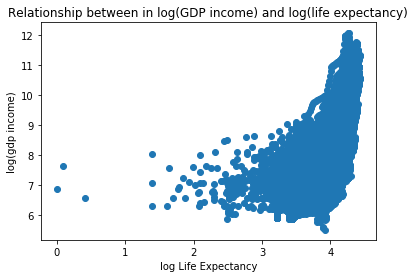

In [57]:
plt.scatter(merge_df["log_life_exp"],merge_df["log_gdp_income"])
plt.title("Relationship between log(GDP income) and log(life expectancy)")
plt.xlabel("log Life Expectancy")
plt.ylabel("log(gdp income)")

In [58]:
X1 = merge_df["log_life_exp"].values.reshape(-1,1)
Y1 = merge_df["log_gdp_income"].values.reshape(-1,1)
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(X1,Y1, test_size=0.25, random_state=0)

linear_reg = LinearRegression()  
fit = linear_reg.fit(xTrain1, yTrain1)
print(fit)

coeff = linear_reg.coef_
print(coeff)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[2.45250957]]


In [59]:
y_pred1 = linear_reg.predict(xTest1)
y_pred1

array([[8.3354401 ],
       [6.9783743 ],
       [7.10728392],
       ...,
       [7.99757004],
       [8.48059108],
       [8.87534848]])

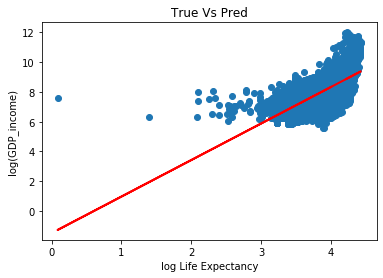

In [72]:
plt.scatter(xTest1, yTest1)
plt.plot(xTest1, y_pred1, color='red', linewidth=2)
plt.title("True Vs Pred")
plt.ylabel("log(GDP_income)")
plt.xlabel("log Life Expectancy")
plt.show()

In [61]:
err = metrics.mean_squared_error(yTest1,y_pred1)
acc = 1 - err
print("Accuracy: ", acc)
print("Error: ", err)

Accuracy:  0.5176426578739037
Error:  0.48235734212609627


In [63]:
merge_df1 = merge_df.groupby("time").mean()
merge_df1.head()

,income_per_person,life_expectancy_years,log_gdp_income,log_life_exp
time,,,,
1800,944.940217,31.503261,6.744176,3.442714
1801,945.375000,31.462717,6.744875,3.441401
1802,948.407609,31.478641,6.746483,3.441492
1803,948.119565,31.384620,6.746919,3.438252
1804,949.793478,31.459891,6.747735,3.440877


Text(0, 0.5, 'log(gdp income)')

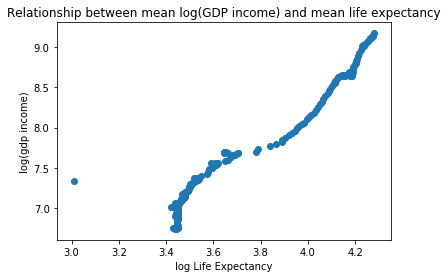

In [108]:
plt.scatter(merge_df1["log_life_exp"],merge_df1["log_gdp_income"])
plt.title("Relationship between mean log(GDP income) and mean life expectancy")
plt.xlabel("log Life Expectancy")
plt.ylabel("log(gdp income)")

In [65]:
X2 = merge_df1["life_expectancy_years"].values.reshape(-1,1)
Y2 = merge_df1["log_gdp_income"].values.reshape(-1,1)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X2,Y2, test_size=0.25, random_state=0)

linear_reg = LinearRegression()  
fit = linear_reg.fit(xTrain2, yTrain2)
print(fit)

coeff = linear_reg.coef_
print(coeff)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[0.05107109]]


In [66]:
y_pred2 = linear_reg.predict(xTest2)
y_pred2

array([[7.98620155],
       [7.02185732],
       [7.00916172],
       [8.24341386],
       [8.26699537],
       [7.42574912],
       [7.0089813 ],
       [8.01901472],
       [9.09748062],
       [7.43296846],
       [7.88727075],
       [7.00011048],
       [7.0574683 ],
       [8.40735204],
       [8.84762461],
       [8.77197113],
       [8.83708813],
       [7.09490008],
       [7.13260941],
       [7.01597027],
       [7.00804315],
       [6.99510051],
       [8.13428827],
       [7.00525644],
       [7.0011208 ],
       [7.34657506],
       [7.11362707],
       [7.00969186],
       [6.98974638],
       [7.0007905 ],
       [8.6164583 ],
       [7.00484565],
       [7.52517953],
       [7.00070168],
       [7.26683477],
       [8.18840419],
       [7.4586178 ],
       [7.41582079],
       [8.80968453],
       [8.08284803],
       [6.99668538],
       [7.0002104 ],
       [7.06895375],
       [8.16566368],
       [8.79034579],
       [8.51439806],
       [8.7070808 ],
       [8.926

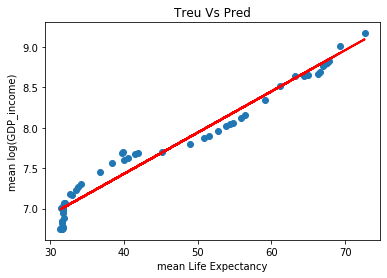

In [70]:
plt.scatter(xTest2, yTest2)
plt.plot(xTest2, y_pred2, color='red', linewidth=2)
plt.title("Treu Vs Pred")
plt.ylabel("mean log(GDP_income)")
plt.xlabel("mean Life Expectancy")
plt.show()

In [75]:
err = metrics.mean_squared_error(yTest2,y_pred2)
acc = 1 - err
print("Accuracy: ", acc)
print("Error: ", err)

Accuracy:  0.9788814825692786
Error:  0.02111851743072136


The linear regression model doesn't perform well on the actual data but taking mean of the features and log of gdp income did help in getting the best fit line of the model.

The hypothesis tried are:
- Life Expectancy ~ log(gdp_income) + err
- log(life expectancy) ~ log(gdp_income) + err
- mean(life expectancy) ~ mean(log(gdp_income)) + err 

The third hypothesis worked fine for the model.

### Problem 5

In [87]:
child_mort = pd.read_csv("C:/Users/mouni/Downloads/DS5500/HW2/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")

In [88]:
merged_df_q5 = pd.merge(child_mort, gdpc_income, on = ['geo', 'time']) 

merged_df_q5.head()

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,income_per_person
0,afg,1800,468.58,603
1,afg,1801,468.58,603
2,afg,1802,468.58,603
3,afg,1803,468.58,603
4,afg,1804,468.58,603


In [89]:
merged_df_q5 = merged_df_q5.rename(columns={"child_mortality_0_5_year_olds_dying_per_1000_born":"child_mort_rate"})
merged_df_q5.head()

,geo,time,child_mort_rate,income_per_person
0,afg,1800,468.58,603
1,afg,1801,468.58,603
2,afg,1802,468.58,603
3,afg,1803,468.58,603
4,afg,1804,468.58,603


In [90]:
merged_df_q5.corr()['income_per_person'].sort_values(ascending=False)

income_per_person    1.000000
time                 0.415972
child_mort_rate     -0.514889
Name: income_per_person, dtype: float64

In [91]:
merge_df2 = merged_df_q5.groupby("time").mean()
merge_df2.head()

,child_mort_rate,income_per_person
time,,
1800,424.585598,944.940217
1801,423.930755,945.375000
1802,423.295315,948.407609
1803,422.893000,948.119565
1804,422.515913,949.793478


In [92]:
merge_df2.corr()['income_per_person'].sort_values(ascending=False)

income_per_person    1.000000
child_mort_rate     -0.946659
Name: income_per_person, dtype: float64

It is observed that there is a strong negative correlation between child mortality rate and gdp per capita income. Linear model can be fit to this data.

In [96]:
X3 = merge_df2["child_mort_rate"].values.reshape(-1,1)
Y3 = merge_df2["income_per_person"].values.reshape(-1,1)
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(X3,Y3, test_size=0.25, random_state=0)

linear_reg = LinearRegression()  
fit1 = linear_reg.fit(xTrain3, yTrain3)
print(fit1)

coeff1 = linear_reg.coef_
print(coeff1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-34.8652511]]


In [97]:
y_pred3 = linear_reg.predict(xTest3)
y_pred3

array([[ 7769.82499242],
       [ 1020.75293579],
       [  981.37092931],
       [ 9220.20321568],
       [ 9382.15268192],
       [ 5766.5017717 ],
       [  830.30585983],
       [ 7942.30054732],
       [13875.79561609],
       [ 4639.54866028],
       [ 7266.04921043],
       [  186.53472558],
       [ 1299.2698255 ],
       [10166.50442665],
       [13055.70326852],
       [12430.9468727 ],
       [12981.52880168],
       [ 1389.38342512],
       [ 1915.49153734],
       [ 1027.57932457],
       [  690.13352852],
       [  264.61469747],
       [ 8597.68901061],
       [  835.97013673],
       [  512.8842765 ],
       [ 3996.09946115],
       [ 1605.51690637],
       [  782.68201116],
       [  207.03170353],
       [  331.3426194 ],
       [11406.93625817],
       [  303.70376005],
       [ 5226.29634996],
       [  206.59399304],
       [ 3386.3426006 ],
       [ 8908.49944789],
       [ 4797.53997717],
       [ 5938.48087574],
       [12832.50261501],
       [ 8278.50692158],


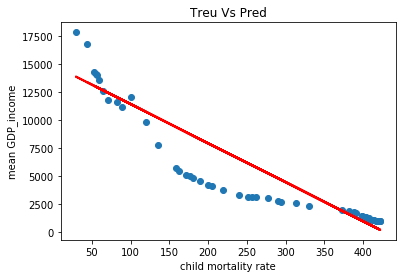

In [105]:
plt.scatter(xTest3, yTest3)
plt.plot(xTest3, y_pred3, color='red', linewidth=2)
plt.title("Treu Vs Pred")
plt.ylabel("mean GDP_income")
plt.xlabel("child mortality rate")
plt.show()

In [106]:
err = metrics.mean_squared_error(yTest3,y_pred3)
acc = 1 - err
print("Accuracy: ", acc)
print("Error: ", err)

Accuracy:  -4003954.6158150965
Error:  4003955.6158150965


The best fit line of the model isn't that accurate. So we try some log function on the gdp per capita income variable.

In [100]:
merge_df2['log_gdp_income'] = np.log(merge_df2.income_per_person)
merge_df2.head()

,child_mort_rate,income_per_person,log_gdp_income
time,,,
1800,424.585598,944.940217,6.851122
1801,423.930755,945.375000,6.851582
1802,423.295315,948.407609,6.854784
1803,422.893000,948.119565,6.854481
1804,422.515913,949.793478,6.856245


In [101]:
X4 = merge_df2["child_mort_rate"].values.reshape(-1,1)
Y4 = merge_df2["log_gdp_income"].values.reshape(-1,1)
xTrain4, xTest4, yTrain4, yTest4 = train_test_split(X4,Y4, test_size=0.25, random_state=0)

linear_reg = LinearRegression()  
fit1 = linear_reg.fit(xTrain4, yTrain4)
print(fit1)

coeff1 = linear_reg.coef_
print(coeff1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[-0.00693673]]


In [102]:
y_pred4 = linear_reg.predict(xTest4)
y_pred4

array([[8.53404197],
       [7.19125853],
       [7.18342316],
       [8.82260665],
       [8.85482783],
       [8.13546433],
       [7.15336752],
       [8.5683574 ],
       [9.74887508],
       [7.91124773],
       [8.43381163],
       [7.02528395],
       [7.24667176],
       [9.01088107],
       [9.58571096],
       [9.46141053],
       [9.57095334],
       [7.2646006 ],
       [7.36927414],
       [7.1926167 ],
       [7.12547908],
       [7.04081861],
       [8.69875233],
       [7.15449447],
       [7.09021388],
       [7.78322821],
       [7.30760214],
       [7.14389236],
       [7.029362  ],
       [7.05409468],
       [9.25767519],
       [7.0485957 ],
       [8.02798601],
       [7.02927491],
       [7.66191207],
       [8.76059062],
       [7.9426814 ],
       [8.16968098],
       [9.54130335],
       [8.63524843],
       [7.16117481],
       [7.08059302],
       [7.25987277],
       [8.73126636],
       [9.50862701],
       [9.12411705],
       [9.38249716],
       [9.654

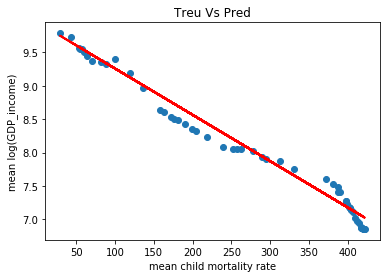

In [104]:
plt.scatter(xTest4, yTest4)
plt.plot(xTest4, y_pred4, color='red', linewidth=2)
plt.title("Treu Vs Pred")
plt.ylabel("mean log(GDP_income)")
plt.xlabel("mean child mortality rate")
plt.show()

In [107]:
err = metrics.mean_squared_error(yTest4,y_pred4)
acc = 1 - err
print("Accuracy: ", acc)
print("Error: ", err)

Accuracy:  0.9803815832460806
Error:  0.01961841675391939


The hypothesis tried are:
- mean child mort rate ~ mean(gdp_income) + err
- mean child mort rate ~ log(mean(gdp_income)) + err